### First baseline model

In [46]:
import numpy as np
import pandas as pd
import sklearn as sk
import plotly
import plotly.express as px
import seaborn as sns



In [18]:
#import the two files and read them via pandas

store = pd.read_csv('data/store.csv', index_col='Store')
train = pd.read_csv('data/train.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
store.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
train.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [20]:
store.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [12]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,618473.000000,618757.000000,618747.000000,618683.000000,618588.000000,618580.000000,618437.000000
mean,558.105623,3.994914,5668.015834,628.909831,0.829167,0.370447,0.173253
std,321.885545,1.997485,3809.655137,463.786905,0.376363,0.482925,0.378466
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3640.000000,397.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5625.000000,604.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,7714.000000,833.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38037.000000,7388.000000,1.000000,1.000000,1.000000


In [13]:
train.isnull().any()

Date             False
Store             True
DayOfWeek         True
Sales             True
Customers         True
Open              True
Promo             True
StateHoliday      True
SchoolHoliday     True
dtype: bool

In [22]:
sum(train.Sales == 0)

105791

In [17]:
train.Date.max()

'2014-07-31'

In [23]:
#Merge the train data with store data
df = train.merge(store, how='left', on='Store')

In [27]:
df.count()

Date                         637774
Store                        618473
DayOfWeek                    618757
Sales                        618747
Customers                    618683
Open                         618588
Promo                        618580
StateHoliday                 618520
SchoolHoliday                618437
StoreType                    618473
Assortment                   618473
CompetitionDistance          616838
CompetitionOpenSinceMonth    422043
CompetitionOpenSinceYear     422043
Promo2                       618473
Promo2SinceWeek              314828
Promo2SinceYear              314828
PromoInterval                314828
dtype: int64

In [29]:
df.Sales.dropna()

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
           ...   
637769     7259.0
637770     9938.0
637771    10564.0
637772    12302.0
637773     3913.0
Name: Sales, Length: 618747, dtype: float64

In [31]:
df = df.drop('Customers', axis=1)

In [33]:
df = df.dropna(subset=['Sales'])

In [35]:
df.count()

Date                         618747
Store                        600028
DayOfWeek                    600282
Sales                        618747
Open                         600125
Promo                        600053
StateHoliday                 600067
SchoolHoliday                599983
StoreType                    600028
Assortment                   600028
CompetitionDistance          598449
CompetitionOpenSinceMonth    409420
CompetitionOpenSinceYear     409420
Promo2                       600028
Promo2SinceWeek              305537
Promo2SinceYear              305537
PromoInterval                305537
dtype: int64

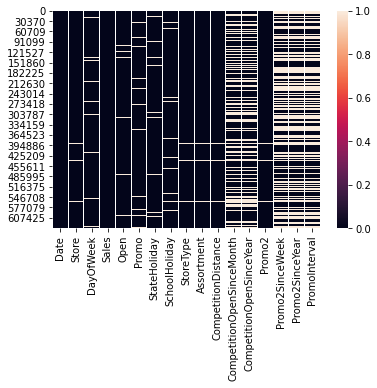

In [37]:
nulls = df.isnull()
sns.heatmap(nulls)

In [40]:
#checking some graphs to check for seasonality
sum_of_sales = df.groupby(by='Date').Sales.sum()

In [41]:
sum_of_sales

Date
2013-01-01      92200.0
2013-01-02    6788505.0
2013-01-03    6167913.0
2013-01-04    6462380.0
2013-01-05    5743875.0
                ...    
2014-07-27     242866.0
2014-07-28    8270451.0
2014-07-29    7139821.0
2014-07-30    7265673.0
2014-07-31    8092801.0
Name: Sales, Length: 577, dtype: float64

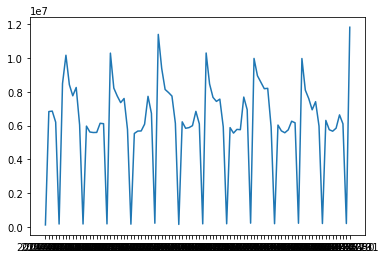

In [58]:
sns.lineplot(data=sum_of_sales.loc['2014-01-01':'2014-03-31'])

In [ ]:
for column in ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
               'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2']:
    nulls = rosman_df_new[rosman_df_new[column].isnull()]
    rosman_df_clean = rosman_df_new[~rosman_df_new.index.isin(nulls.index)]